In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
import os
print("Current Dir", os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","Valid")


Current Dir c:\Users\rchet\Documents\potato-disease-project


In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [9]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [21]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    65,028,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,040,291 (248.11 MB)

 Trainable params: 65,040,291 (248.11 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
training_history=cnn.fit(training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 557ms/step - accuracy: 0.3309 - loss: 479.6729 - val_accuracy: 0.4033 - val_loss: 18.1886
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 541ms/step - accuracy: 0.4446 - loss: 24.2699 - val_accuracy: 0.8167 - val_loss: 0.9875
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 522ms/step - accuracy: 0.7491 - loss: 1.4481 - val_accuracy: 0.6567 - val_loss: 0.5207
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 519ms/step - accuracy: 0.7689 - loss: 0.5669 - val_accuracy: 0.7800 - val_loss: 0.5942
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 518ms/step - accuracy: 0.7536 - loss: 0.5819 - val_accuracy: 0.9067 - val_loss: 0.2748
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 519ms/step - accuracy: 0.8348 - loss: 0.4115 - val_accuracy: 0.9033 - val_loss: 0.2778
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 517ms/step - accuracy: 0.8566 - loss: 0.3617 - val_accuracy: 0.9067 - val_loss: 0.3353
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 522ms/step - accuracy: 0.8732 - loss: 0.3058 - val_

In [24]:
train_loss,train_acc = cnn.evaluate(training_set)
print("Training Accuracy",train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9673 - loss: 0.1859
Training Accuracy 0.9744444489479065


In [25]:
valid_loss,valid_acc = cnn.evaluate(validation_set)
print("Validation Accuracy",valid_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9136 - loss: 0.3234
Validation Accuracy 0.8999999761581421


In [26]:
cnn.save('trained_plant_disease_model.keras')

In [27]:
training_history.history

{'accuracy': [0.3522222340106964,
  0.5299999713897705,
  0.7288888692855835,
  0.7788888812065125,
  0.7699999809265137,
  0.8399999737739563,
  0.855555534362793,
  0.8799999952316284,
  0.8377777934074402,
  0.8533333539962769],
 'loss': [289.8893737792969,
  15.524799346923828,
  1.1950005292892456,
  0.5471172332763672,
  0.5136398077011108,
  0.43147924542427063,
  0.35269895195961,
  0.32631781697273254,
  0.35898101329803467,
  0.39390987157821655],
 'val_accuracy': [0.4033333361148834,
  0.8166666626930237,
  0.6566666960716248,
  0.7799999713897705,
  0.9066666960716248,
  0.903333306312561,
  0.9066666960716248,
  0.8700000047683716,
  0.8866666555404663,
  0.8999999761581421],
 'val_loss': [18.18857765197754,
  0.9874686598777771,
  0.520747184753418,
  0.5941597819328308,
  0.274849534034729,
  0.2777928411960602,
  0.33528563380241394,
  0.32003259658813477,
  0.30358195304870605,
  0.3212955892086029]}

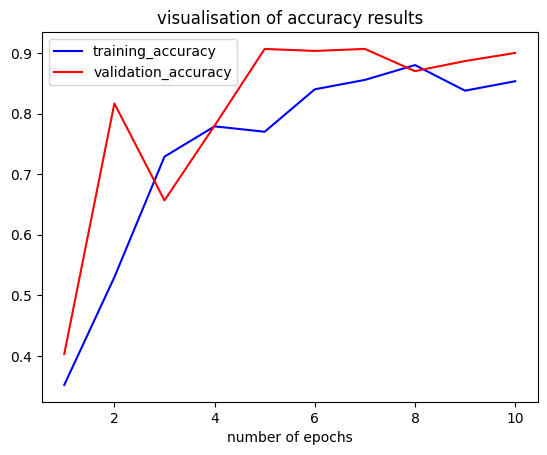

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='blue',label='training_accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='red',label='validation_accuracy')
plt.xlabel('number of epochs')
plt.title('visualisation of accuracy results')
plt.legend()
plt.show()